# Qubits, Paridad e Ising 

- original_integer
- base_2
- rotate 
- Operador K 
- Diagonalización por bloques ¿?

In [1]:
using LinearAlgebra
using Plots

In [28]:
# Primero definimos algunas funciones auxiliares que nos ayudarán a convertir de un número a una lista de bits y viceversa.
"""
La función convierte un número en binario a su entero original.
"""
function original_integer(list)
    return parse(Int, join(list); base=2)
end


# @doc Recibe un entero y lo escribe en binario, el pad nos dice qué tantos ceros tendrá la representación binaria e.g pad = 2 es 00, pad = 3 es 000

function base_2(integer; pad= nothing)
    if pad == nothing
        return reverse(digits(integer, base = 2))
    else
        return reverse(digits(integer, base = 2, pad = pad))
    end
end

base_2 (generic function with 1 method)

## Hola

In [30]:
A = base_2(5; pad=nothing)
@doc original_integer
# @doc base_2

La función convierte un número en binario a su entero original.


In [4]:
original_integer([1,1,1,1,1])

31

In [5]:
function rotate(index,N)
    vec = base_2(index, pad=N)
    return original_integer([vec[end];vec[1:end-1]]), index
end

rotate (generic function with 1 method)

In [6]:
rotate(1,3)

(4, 1)

In [7]:
m = 3 # Número de Qubits
function OperatorK(m) # m = particles
    am = original_integer(fill(1,m))
    A = zeros(am+1,am+1) #la primer posición es el cero

    for i in 0:am # m es el número de qubits 
       A[ rotate(i,m)[1]+1, i+1 ] = 1
    end
    return A
end
OperatorK(3)

8×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [8]:
# En un campo externo h 
J = 1
function IsingHomogeneo(N,b; cerrada = false) #Keyword Arguments
    H = 0
    totalparticulas = N
    if cerrada == false 
        M = (N - 1)
    elseif cerrada == true 
        M = N 
    end

    for i in 0:(M-1)
        H = H .+ J*(Sigma(3, mod(i,N),totalparticulas)*Sigma(3,mod((i+1),N),totalparticulas))
    end
    for j in 0:N-1
        H = H .+ b*Sigma(1,j,totalparticulas)
    end
    return H 
end

IsingHomogeneo (generic function with 1 method)

In [9]:
function ProjectionParity(N,b, Bloque; cerrada = false)
    H = IsingHomogeneo(N,b, cerrada = false)
    # P = parity(N)
    OpK = OperatorK(N)
    # vals, v = eigen(P) 
    valsK, vecK = eigen(OpK)
    valsunique = roundedvals(valsK)[1]
    vals = roundedvals(valsK)[2]

    Bloques = Dict()
    for i in 1:length(valsunique)
        Bloques[i] = length(findall(vals .== valsunique[i]))
    end

    vec = vecK[:, findall(vals .== valsunique[Bloque])]

    num = Bloques[Bloque]
    Projection = zeros(ComplexF64,num,num)

    for k in 1:num
        for j in 1:num
            Projection[j,k] = vec[:,j]'*H*vec[:,k]
        end
    end
    return Projection
end

ProjectionParity (generic function with 1 method)

In [31]:
ProjectionParity(4,1,1,cerrada = false)

4×4 Matrix{ComplexF64}:
     -3.0+0.0im      1.41421+0.0im     -1.41421+0.0im           0.0+0.0im
  1.41421+0.0im          0.0+0.0im          0.0+0.0im   3.69779e-32+0.0im
 -1.41421+0.0im          0.0+0.0im          0.0+0.0im   3.69779e-32+0.0im
      0.0+0.0im  3.69779e-32+0.0im  3.69779e-32+0.0im  -2.22045e-16+0.0im

In [32]:
N = 4
listProj1 = []
for b in 0:0.01:2
     H1 = ProjectionParity(N,b,1,cerrada = false)
     ValsProj1 = eigen(H1).values
     append!(listProj1,map(x->[b,x],ValsProj1))
end
x_listProj = [l[1] for l in listProj1]
y_listProj = [l[2] for l in listProj1]

listProj2 = []
for b in 0:0.01:2
     H2 = ProjectionParity(N,b,2, cerrada = false)
     ValsProj2 = eigen(H2).values
     append!(listProj2,map(x->[b,x],ValsProj2))
end
x_listProj2 = [l[1] for l in listProj2]
y_listProj2 = [l[2] for l in listProj2]

listProj3 = []
for b in 0:0.01:2
     H3 = ProjectionParity(N,b,3, cerrada = false)
     ValsProj3 = eigen(H3).values
     append!(listProj3,map(x->[b,x],ValsProj3))
end
x_listProj3 = [l[1] for l in listProj3]
y_listProj3 = [l[2] for l in listProj3]

listProj4 = []
for b in 0:0.01:2
     H4 = ProjectionParity(N,b,4, cerrada = false)
     ValsProj4 = eigen(H4).values
     append!(listProj4,map(x->[b,x],ValsProj4))
end
x_listProj4 = [l[1] for l in listProj4]
y_listProj4 = [l[2] for l in listProj4]

1206-element Vector{Number}:
     -2.9999999999999996 + 0.0im
 -3.3306690738754696e-16 + 0.0im
 -1.1102230246251565e-16 + 0.0im
  1.1102230246251565e-16 + 0.0im
                     3.0 + 0.0im
                     3.0 + 0.0im
                        -3.0001333422218135
                        -0.028283014140812135
                        -0.0001333274079335922
                         0.028283014140815244
                         ⋮
      2.0449943184679396 + 0.0im
       5.753281086408472 + 0.0im
       8.257093813045477 + 0.0im
                        -8.2954720941073
                        -2.772001872658759
                        -2.045762140593805
                         2.045762140593806
                         5.772001872658763
                         8.295472094107305

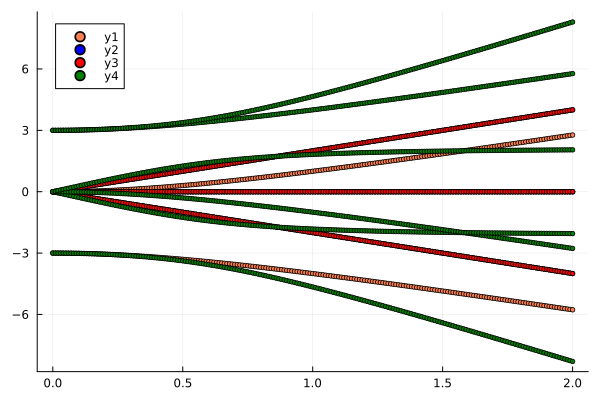

In [33]:
scatter(real(x_listProj),real(y_listProj), color = "coral", markersize =2.5)
scatter!(real(x_listProj2), real(y_listProj2), color = "blue", markersize = 2.5)
scatter!(real(x_listProj3), real(y_listProj3), color = "red", markersize = 2.5)
scatter!(real(x_listProj4), real(y_listProj4), color = "green", markersize = 2.5)


# Merge Two Integers

La función recibe tres enteros merge_two_integers(a, b, mask)

Los dígitos binarios de $a$ se colocan en los 1s de mask

In [88]:
mask = original_integer([0,1,1,0,0])
a = original_integer([1,1])
b = original_integer([1,0,1])
mask, a , b
original_integer([1,1,1,0,1])

29

In [36]:
original_integer([1,0,0,0])

8

In [37]:
mask & 1

0

In [74]:
result = 0
bit = b & 1 # ¿El ultimo bit de b es 1 o 0? 
result = result | bit # Esto hace que el último bit de result sea igual al último bit de b
base_2(result, pad = 5)
base_2(mask,pad = 5)

5-element Vector{Int64}:
 0
 1
 1
 0
 0

In [83]:
new_mask = mask >> 1
nm = base_2(new_mask, pad = 4) # Eliminamos un bit de la máscara, el pad es visual
new_b = b >> 1
bm = base_2(new_b, pad = 2) # Eliminamos un bit de b, el pad es visual
new_mask & 1 # El último bit también es 0
bit = new_b & 1 

nm, bm, bit 

([0, 1, 1, 0], [1, 0], 0)

In [84]:
function merge_two_integers(a,b,mask)
   
end

merge_two_integers (generic function with 1 method)

In [1]:
mask = original_integer([0,1,1,0,0])
a = original_integer([1,0])
b = original_integer([1,0,1])

mask & 1 # El primer índice no tiene un bit, por lo cual no se modifica aún
new_mask = mask >> 1
new_mask & 1 # El segundo índice tampoco tiene un bit, por lo cual no se modifica aún
new_mask2 = new_mask >> 1
new_mask2 & 1 # El tercer índice tiene un bit, por lo cual se modifica
bit = a & 1 # Es el elemento a reemplazar en new_mask2
new_mask3 = new_mask2 |bit
new_mask4 = new_mask3 >> 1 
new_mask4 & 1   # El cuarto índice tiene un bit, por lo cual se modifica

new_mask5 = new_mask4 | bit # Se reemplaza el bit
new_mask6 = new_mask5 >> 1
new_mask6 & 1
new_mask6 == 0 # La máscara ya no tiene más bits y se termina el proceso de target, ahora falta hacer el proceso de untouched 

function merge_two_integers(a,b,mask)
    bit = a & 1 # Es el valor que vamos a reemplazar (Recordar que una vez sea reemplazado, hay que irnos al siguiente dígito)
    k = 0
    while mask & 1 == 0
        new_mask = mask >> 1
        k += 1
    end
    resultados = []

    new_mask = mask

    k2 = 0
    while (new_mask & 1 ==1) & (a & 1 == 1) | k2 == 10
        if a & 1 == 0
          new_mask = new_mask & ~a
        elseif a & 1 == 1
            new_mask = new_mask | a
        end
    push!(resultados, new_mask)
    new_mask = new_mask >> 1
    a = a >> 1
    k2 += 1
    end


    # a >> 1 # Nos movemos al siguiente bit
        #new_mask = new_mask >> 1 
        #a = a >> 1

    

    return base_2(new_mask), base_2(mask),resultados

end

UndefVarError: UndefVarError: `original_integer` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
#merge_two_integers(a,b,mask)

In [ ]:
new_mask = original_integer([1,1])



3

In [ ]:
mask = original_integer([1,0,0,0])
#new_mask = mask >> 5
bit = 1 &  1
bit << 2
new_mask = mask | bit<<2 #[1,1,0,0] 
new_mask2 = new_mask | bit << 2 # ¿Cómo elimino el bit que ya puse?
new_mask3 = new_mask2 & ~bit << 2

8

In [288]:
base_2(8)


4-element Vector{Int64}:
 1
 0
 0
 0